> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [41]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd 
import numpy as np
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [42]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()
#   types and look for instances of missing or possibly errant data.

df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [43]:
# Changes Needed:

# Changing column case and using underscores will make columns easier to read and work with
# Changing column mispellings will make columns easier to read and work with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [44]:
df.AppointmentDay.min(), df.AppointmentDay.max()

('2016-04-29T00:00:00Z', '2016-06-08T00:00:00Z')

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [45]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# Check Nulls of Dataframe:
df.isnull().any()
# Check Number of Dupicates:
df.duplicated().sum()

0

In [46]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [47]:
df.AppointmentID.duplicated().sum()

0

In [48]:
df.PatientId.duplicated().sum()


48228

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

Questions

How many percent of patients missed their scheduled appointment?
What is the gender distribution for show / no-show patients?
Are there patients with more than one appointment? If yes, what are the top 10 patients with most appointments?
What factors are important to know in order to predict if a patient will show up for their scheduled appointment?


In [49]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Research Question 2  (Replace this header name!)

In [50]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

df.columns = df.columns.str.lower()
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

In [51]:
df= df[df['age'] > 0]
df.head(1)


,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [52]:
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df.head(1)


,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [53]:
df['appointmentday'] = df['appointmentday'].apply(lambda x: x.strftime('%m-%d-%Y'))
#Ignoring the time portion of appointment_day to keep value uniform with schedule_day




In [54]:
# Converting no_show field from string to int so it can be plotted in charts

df["no-show"] = np.where((df['no-show']=="Yes"), 1, 0)
df.head()


,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,04-29-2016,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,04-29-2016,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,04-29-2016,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,04-29-2016,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,04-29-2016,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [55]:
# remove the weird values from handcap variable
df.loc[df.handcap > 1, 'handcap'] = 1
df.handcap.unique()

array([0, 1])

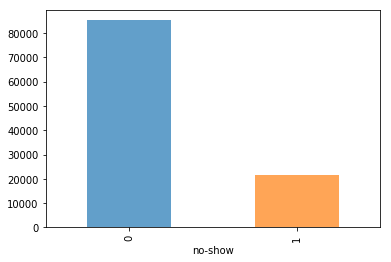

In [56]:

df_noshow = df.groupby("no-show")["appointmentday"].count().plot(kind='bar',alpha =0.7)


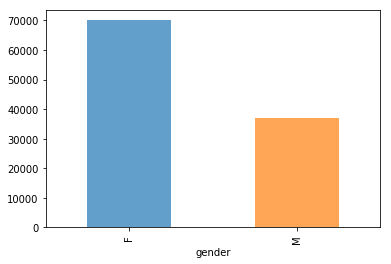

In [57]:
df_gender = df.groupby('gender')['age']
df_gender.describe()
df_gender.count().plot(kind='bar',alpha =0.7)

gender
F    70118
M    36869
Name: patientid, dtype: int64

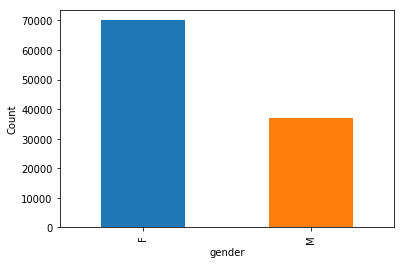

In [58]:
df.groupby('gender')['patientid'].count().plot(kind='bar').set_ylabel('Count')
df.groupby('gender')['patientid'].count()


,mean,std
gender,,
F,39.849183,21.560250
M,35.400418,23.824998


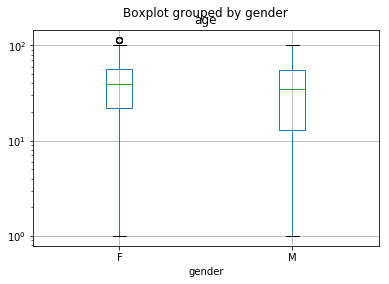

In [59]:
df.boxplot(column=['age'], by='gender').set_yscale('log')
pd.DataFrame(df.groupby(['gender'])['age'].describe().loc[:,['mean', 'std']])

no-show
age alcoholism          
1   0           0.817422
2   0           0.844252
3   0           0.816920
4   0           0.782743
    1           1.000000
5   0           0.785618
    1           0.000000
6   0           0.792242
7   0           0.788772
    1           1.000000
8   0           0.776528
    1           1.000000
9   0           0.734694
10  0           0.761381
11  0           0.793132
    1           1.000000
12  0           0.755760
    1           0.000000
13  0           0.724796
    1           1.000000
14  0           0.717099
    1           1.000000
15  0           0.733884
    1           1.000000
16  0           0.749642
    1           0.250000
17  0           0.737716
    1           0.666667
18  0           0.763992
    1           1.000000
...                  ...
79  0           0.841146
    1           1.000000
80  0           0.838966
    1           1.000000
81  0           0.851675
    1           0.937500
82  0           0.830334
    1           1.000000
83  0           0.782143
84  0           0.887097
    1           1.000000
85  0           0.821168
    1           1.000000
86  0           0.838462
87  0           0.853261
88  0           0.904762
89  0           0.832370
90  0           0.788991
91  0           0.803030
92  0           0.767442
93  0           0.811321
94  0           0.818182
95  0           0.750000
96  0           0.941176
97  0           0.818182
98  0           0.833333
99  0           1.000000
100 0           1.000000
102 0           1.000000
115 0           0.400000

[180 rows x 1 columns]

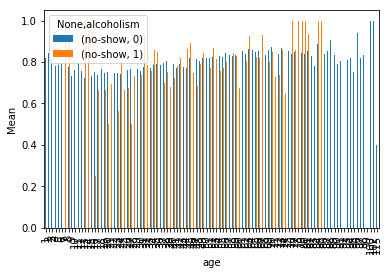

In [60]:
df['no-show']= pd.get_dummies(df['no-show'])
df.groupby(['age', 'alcoholism'])[['no-show']].mean().unstack().plot(kind='bar').set_ylabel('Mean')
df.groupby(['age', 'alcoholism'])[['no-show']].mean()

In [61]:
df.patientid.value_counts().iloc[0:10]


8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
7.579746e+13    62
6.264199e+12    62
8.713749e+14    62
6.684488e+13    57
8.722785e+11    55
Name: patientid, dtype: int64

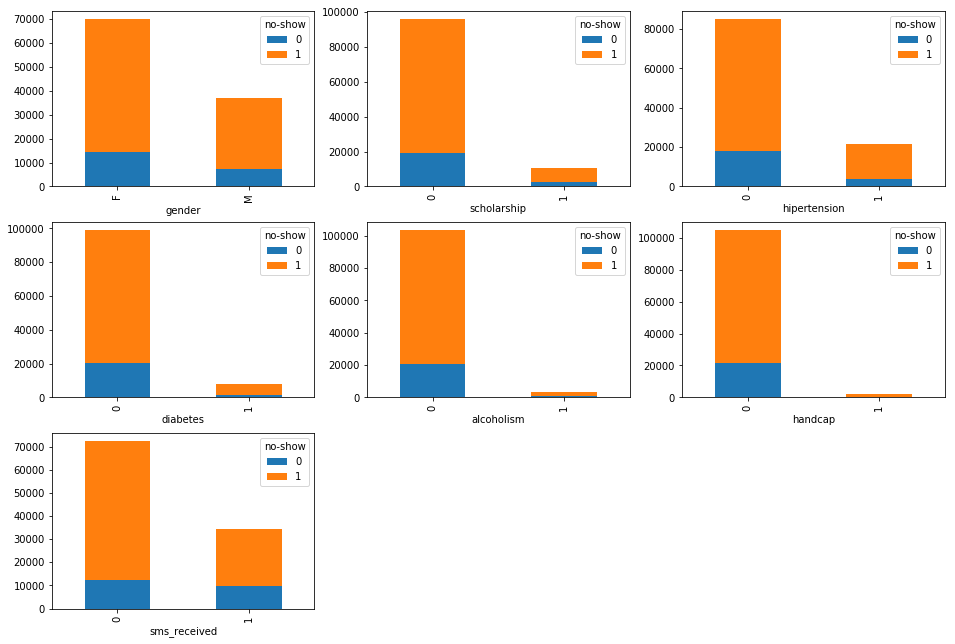

In [65]:
categories = ['gender', 'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received']
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 11))
for i, var in enumerate(categories):
    ax = fig.add_subplot(3, 3, i+1)
    df.groupby([var, 'no-show'])[var].count().unstack('no-show').plot(ax=ax, kind='bar', stacked=True)

,age
count,106987.000000
mean,38.316085
std,22.466214
min,1.000000
25%,19.000000
50%,38.000000
75%,56.000000
max,115.000000


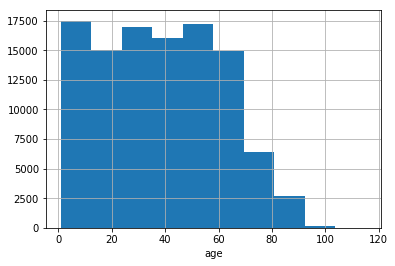

In [66]:
ax = df['age'].hist()
ax.set_xlabel('age')
pd.DataFrame(df['age'].describe())

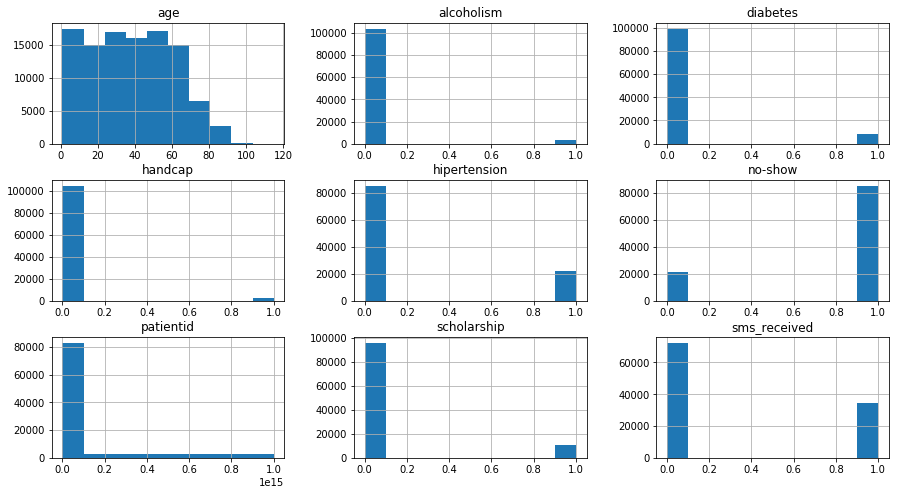

In [57]:
df.hist(figsize=(15, 8));


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [58]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0